# Classificadores em cascata

### Teoria

A detecção de objetos usando classificadores em cascata baseados em recursos Haar é um método eficaz de detecção de **objetos** proposto por Paul Viola e Michael Jones em seu artigo, **"Detecção rápida de objetos usando uma cascata impulsionada de recursos simples"** em 2001. **É uma abordagem baseada em aprendizado de máquina em que um a função em cascata é treinada a partir de muitas imagens positivas e negativas**. Em seguida, é usado para detectar objetos em outras imagens.

O exemplo mais comum e a detecção de rosto. Inicialmente, o algoritmo precisa de muitas imagens positivas (imagens de rostos) e imagens negativas (imagens sem rostos) para treinar o classificador. Em seguida, precisamos extrair as principais caravteristicas (features) dele. Para isso, são usados os recursos Haar mostrados na imagem abaixo. Eles são como nosso núcleo convolucional. **Cada recurso é um único valor obtido subtraindo a soma dos pixels sob o retângulo branco da soma dos pixels sob o retângulo preto.**

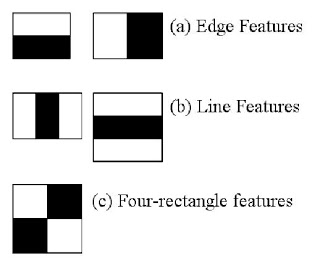

Agora, todos os tamanhos e localizações possíveis de cada kernel são usados para calcular as possiveis features. (Imagine quanta computação ele precisa? Até mesmo uma janela 24x24 resulta em mais de 160000 recursos). Para cada cálculo de recurso, precisamos encontrar a soma dos pixels sob os retângulos branco e preto. Para resolver isso, eles introduziram a **imagem integral**. Por maior que seja a sua imagem, ela reduz os cálculos de um determinado pixel a uma operação que envolve apenas quatro pixels. 

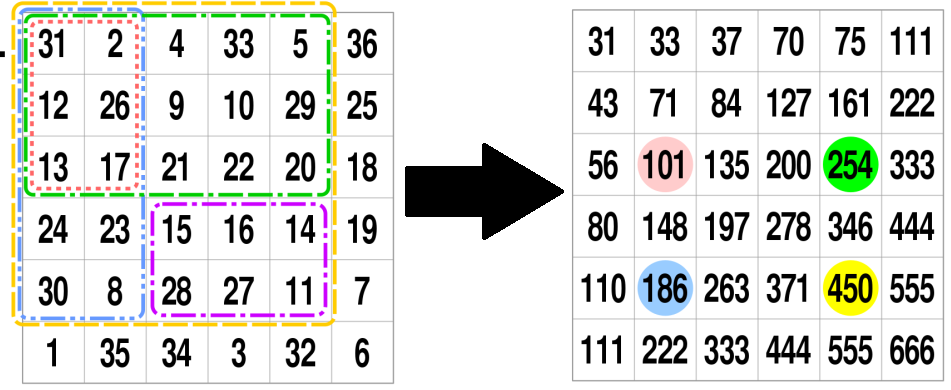

Mas, entre todos esses recursos que calculamos, a maioria deles é irrelevante. Por exemplo, considere a imagem abaixo. A linha superior mostra dois bons recursos. O primeiro recurso selecionado parece focar na propriedade de que a região dos olhos costuma ser mais escura do que a região do nariz e das bochechas. O segundo recurso selecionado depende da propriedade de os olhos serem mais escuros do que a ponte do nariz. Mas as mesmas janelas aplicadas às bochechas ou a qualquer outro lugar são irrelevantes. Então, como selecionamos os melhores recursos entre mais de 160000 recursos? É conseguido por Adaboost.

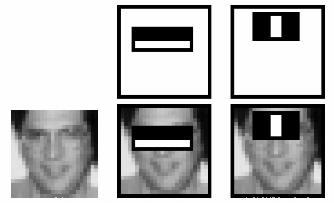

Para isso, aplicamos todo e qualquer recurso em todas as imagens de treinamento. Para cada característica, ele encontra o melhor limite que classificará as faces em positivas e negativas. Obviamente, haverá erros ou classificações incorretas. Selecionamos os recursos com taxa de erro mínima, o que significa que são os recursos que classificam com mais precisão as imagens faciais e não faciais. (O processo não é tão simples assim. Cada imagem recebe um peso igual no início. Após cada classificação, os pesos das imagens classificadas incorretamente são aumentados. Em seguida, o mesmo processo é feito. Novas taxas de erro são calculadas. Também novos pesos. processo é continuado até que a precisão necessária ou taxa de erro seja alcançada ou o número necessário de recursos seja encontrado).

O classificador final é uma soma ponderada desses classificadores fracos. É chamado de fraco porque sozinho não consegue classificar a imagem, mas junto com outros formam um classificador forte. O documento afirma que até 200 recursos fornecem detecção com 95% de precisão. Sua configuração final tinha cerca de 6.000 recursos. (Imagine uma redução de 160000+ recursos para 6000 recursos. Isso é um grande ganho).

Então agora você tira uma imagem. Pegue cada janela 24x24. Aplique 6000 recursos a ele. Verifique se é cara ou não. Não é um pouco ineficiente e demorado? Sim, ele é. Os autores têm uma boa solução para isso.

Em uma imagem, a maior parte da imagem é uma região sem rosto. Portanto, é uma ideia melhor ter um método simples para verificar se uma janela não é uma região de face. Se não estiver, descarte-o de uma vez e não processe novamente. Em vez disso, concentre-se em regiões onde pode haver um rosto. Dessa forma, gastamos mais tempo verificando as possíveis regiões de rosto.

Para isso, eles introduziram o conceito de Cascata de Classificadores. Em vez de aplicar todos os 6000 recursos em uma janela, os recursos são agrupados em diferentes estágios de classificadores e aplicados um por um. (Normalmente, os primeiros estágios conterão muito menos recursos). Se uma janela falhar no primeiro estágio, descarte-a. Não consideramos os recursos restantes nele. Se passar, aplique o segundo estágio de recursos e continue o processo. A janela que passa por todos os estágios é uma região de rosto. Como é esse plano!

O detector dos autores tinha mais de 6.000 recursos com 38 estágios com 1, 10, 25, 25 e 50 recursos nos primeiros cinco estágios. (Os dois recursos na imagem acima são, na verdade, obtidos como os dois melhores recursos do Adaboost). De acordo com os autores, em média, 10 recursos em mais de 6.000 são avaliados por subjanela.

Portanto, esta é uma explicação simples e intuitiva de como funciona a detecção de rosto Viola-Jones. Leia o artigo para obter mais detalhes ou verifique as referências na seção Recursos adicionais.

In [1]:
# bibliotecas
import cv2
import os

# Path
path = os.getcwd()

# Verificando se a pasta com Haarcascades existe
if os.path.isdir('Haarcascades') == False:
    print('A pasta Haarcascades não se encontra.')
else:
    print('A pasta Haarcascades existe.')
    
    
# Lendo o xml
cascade = cv2.CascadeClassifier(path + '\\Haarcascades\\haarcascade_frontalface_default.xml')

A pasta Haarcascades existe.


### Funcao detectMultiScale

$cascade.detectMultiScale(scaleFactor, minNeighbors, minSize, maxSize)$

* **scaleFactor**: Parâmetro que especifica o quanto o tamanho da imagem é reduzido em cada escala da imagem.
* **minNeighbors**: parâmetro que especifica quantos vizinhos cada retângulo candidato deve ter para retê-lo.
* **minSize**: Tamanho mínimo do objeto possível. Objetos menores do que isso são ignorados.
* **maxSize**: Tamanho máximo do objeto possível. Objetos maiores do que isso são ignorados.

In [2]:
# Captura os frames
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    
    faces = cascade.detectMultiScale(frame, 1.1, 4)
    
    for (x, y , w ,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0 , 0), 3)
    
    cv2.imshow('Video', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
            
cap.release()
cv2.destroyAllWindows()